<a href="https://colab.research.google.com/github/igedeaguss/trip-traveler-analysis/blob/main/Analisis_Data_Perjalanan_Wisatawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Masukkan username dan key dari kaggle.json
os.environ['KAGGLE_USERNAME'] = "igedeagus"
os.environ['KAGGLE_KEY'] = "e05d87ebd645fa88e09fae2140ef727e"

In [ ]:
!kaggle datasets download -d rkiattisak/traveler-trip-data

Dataset URL: https://www.kaggle.com/datasets/rkiattisak/traveler-trip-data
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/4.21k [00:00<?, ?B/s]
100% 4.21k/4.21k [00:00<00:00, 6.71MB/s]


In [ ]:
! unzip /content/traveler-trip-data.zip

Archive:  /content/traveler-trip-data.zip
  inflating: Travel details dataset.csv  


# Business Understanding

Tujuan dari analisis ini adalah mengetahui pola perjalanan, preferensi, dan perilaku wisatawan berdasarkan data perjalanan. Hasilnya diharapkan dapat memberikan wawasan yang berguna untuk perusahaan travel, agen perjalanan, dan penyedia layanan pariwisata dalam mengembangkan strategi pemasaran, penawaran paket perjalanan, dan layanan pelanggan yang lebih baik

# Data Understanding

## Data Import

In [ ]:
data = pd.read_csv("/content/Travel details dataset.csv")
data

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.2+ KB


Column details:

• Trip ID: A unique identifier for each trip taken by a traveler.

• Destination: The name of the city or country visited by the traveler.

• Start date: The date the traveler started the trip.

• End date: The date the traveler ended the trip.

• Duration (days): The number of days the traveler spent on the trip.

• Traveler name: The name of the traveler.

• Traveler age: The age of the traveler at the time of the trip.

• Traveler gender: The gender of the traveler.

• Traveler nationality: The nationality of the traveler.

• Accommodation type: The type of accommodation the traveler stayed in, such as hotel, hostel, or Airbnb.

• Accommodation cost: The cost of the accommodation for the entire trip.

• Transportation type: The mode of transportation used by the traveler, such as plane, train, or car.

• Transportation cost: The cost of transportation for the entire trip.

In [ ]:
data.isnull().sum()

Trip ID                 0
Destination             2
Start date              2
End date                2
Duration (days)         2
Traveler name           2
Traveler age            2
Traveler gender         2
Traveler nationality    2
Accommodation type      2
Accommodation cost      2
Transportation type     3
Transportation cost     3
dtype: int64

In [ ]:
data.duplicated().sum()

0

## Data Cleansing

In [ ]:
data_clean = data.copy()

#Mengubah kolom start date dan end date menjadi datetime
data_clean['Start date'] = pd.to_datetime(data_clean['Start date'], errors='coerce')
data_clean ['End date'] = pd.to_datetime(data_clean['End date'], errors='coerce')

In [ ]:
data_clean

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",2023-05-01,2023-05-08,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",2023-06-15,2023-06-20,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",2023-07-01,2023-07-08,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",2023-08-15,2023-08-29,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",2023-09-10,2023-09-17,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",2023-08-01,2023-08-10,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,136,"Vancouver, Canada",2023-08-15,2023-08-21,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,137,"Bangkok, Thailand",2023-09-01,2023-09-08,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
137,138,"Barcelona, Spain",2023-09-15,2023-09-22,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


In [ ]:
#Membuat kolom bulan_tahun
import datetime as dt
data_clean['year_month'] = data_clean['Start date'].dt.to_period('M')


In [ ]:
#Menghapus baris yang null
data_clean = data_clean.dropna()

data_clean

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,year_month
0,1,"London, UK",2023-05-01,2023-05-08,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600,2023-05
1,2,"Phuket, Thailand",2023-06-15,2023-06-20,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500,2023-06
2,3,"Bali, Indonesia",2023-07-01,2023-07-08,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700,2023-07
3,4,"New York, USA",2023-08-15,2023-08-29,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000,2023-08
4,5,"Tokyo, Japan",2023-09-10,2023-09-17,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200,2023-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",2023-08-01,2023-08-10,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000,2023-08
135,136,"Vancouver, Canada",2023-08-15,2023-08-21,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000,2023-08
136,137,"Bangkok, Thailand",2023-09-01,2023-09-08,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000,2023-09
137,138,"Barcelona, Spain",2023-09-15,2023-09-22,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500,2023-09


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 138
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Trip ID               136 non-null    int64         
 1   Destination           136 non-null    object        
 2   Start date            136 non-null    datetime64[ns]
 3   End date              136 non-null    datetime64[ns]
 4   Duration (days)       136 non-null    float64       
 5   Traveler name         136 non-null    object        
 6   Traveler age          136 non-null    float64       
 7   Traveler gender       136 non-null    object        
 8   Traveler nationality  136 non-null    object        
 9   Accommodation type    136 non-null    object        
 10  Accommodation cost    136 non-null    object        
 11  Transportation type   136 non-null    object        
 12  Transportation cost   136 non-null    object        
 13  year_month            136

# Exploratory Data Analysis

## Pola Perjalanan

In [ ]:
#Melihat data unik di kolom destination
data_clean['Destination'].unique()

array(['London, UK', 'Phuket, Thailand', 'Bali, Indonesia',
       'New York, USA', 'Tokyo, Japan', 'Paris, France',
       'Sydney, Australia', 'Rio de Janeiro, Brazil',
       'Amsterdam, Netherlands', 'Dubai, United Arab Emirates',
       'Cancun, Mexico', 'Barcelona, Spain', 'Honolulu, Hawaii',
       'Berlin, Germany', 'Marrakech, Morocco', 'Edinburgh, Scotland',
       'Paris', 'Bali', 'London', 'Tokyo', 'New York', 'Sydney', 'Rome',
       'Bangkok', 'Hawaii', 'Barcelona', 'Japan', 'Thailand', 'France',
       'Australia', 'Brazil', 'Greece', 'Egypt', 'Mexico', 'Italy',
       'Spain', 'Canada', 'New York City, USA', 'Bangkok, Thailand',
       'Vancouver, Canada', 'Sydney, AUS', 'Seoul, South Korea',
       'Los Angeles, USA', 'Rome, Italy', 'Cape Town', 'Cape Town, SA',
       'Sydney, Aus', 'Bangkok, Thai', 'Phuket, Thai', 'Dubai', 'Seoul',
       'Rio de Janeiro', 'Amsterdam', 'Phuket', 'Santorini', 'Phnom Penh',
       'Athens, Greece', 'Cape Town, South Africa',
       'Au

Setelah melihat nilai unik di kolom destination, formatnya cukup beragam. Ada yang menggunakan format nama kota dan negara, format nama kota saja, serta format negara saja. Untuk memudahkan analisis maka digunakan nama kotanya saja  

In [ ]:
#Menyimpan nama kota
data_clean['Destination'] = data_clean['Destination'].apply(lambda x: x.split(',')[0])

In [ ]:
data_clean['Destination'].unique()

array(['London', 'Phuket', 'Bali', 'New York', 'Tokyo', 'Paris', 'Sydney',
       'Rio de Janeiro', 'Amsterdam', 'Dubai', 'Cancun', 'Barcelona',
       'Honolulu', 'Berlin', 'Marrakech', 'Edinburgh', 'Rome', 'Bangkok',
       'Hawaii', 'Japan', 'Thailand', 'France', 'Australia', 'Brazil',
       'Greece', 'Egypt', 'Mexico', 'Italy', 'Spain', 'Canada',
       'New York City', 'Vancouver', 'Seoul', 'Los Angeles', 'Cape Town',
       'Santorini', 'Phnom Penh', 'Athens', 'Auckland'], dtype=object)

Text(0.5, 1.0, 'Top 5 Destination')

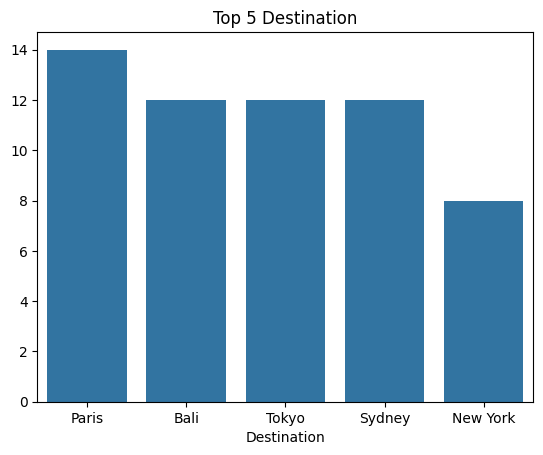

In [ ]:
top_5 = data_clean['Destination'].value_counts().head(5)
sns.barplot(x=top_5.index, y=top_5.values)
plt.title("Top 5 Destination")

In [ ]:
data_paris = data_clean[data_clean['Destination'] == 'Paris']
data_paris['Traveler nationality'].value_counts()

Traveler nationality
American      7
Canadian      2
USA           2
Vietnamese    1
French        1
British       1
Name: count, dtype: int64

In [ ]:
data_clean[data_clean['Destination'] == 'Paris']

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,year_month
5,6,Paris,2023-10-05,2023-10-10,5.0,Michael Brown,42.0,Male,American,Hotel,1500,Flight,800,2023-10
16,17,Paris,2023-09-01,2023-09-10,9.0,Sarah Johnson,30.0,Female,American,Hotel,$900,Plane,$400,2023-09
24,25,Paris,2023-12-22,2023-12-28,6.0,Lily Nguyen,24.0,Female,Vietnamese,Hotel,"$1,400",Train,$100,2023-12
38,39,Paris,2022-06-12,2022-06-19,7.0,Mia Johnson,25.0,Female,American,Hotel,1400,Plane,600,2022-06
49,50,Paris,2023-08-15,2023-08-22,7.0,Jennifer Nguyen,31.0,Female,Canadian,Hotel,"$1,200",Train,$300,2023-08
60,61,Paris,2022-07-12,2022-07-18,6.0,Rachel Sanders,35.0,Female,American,Hotel,1200,Plane,800,2022-07
66,67,Paris,2024-05-06,2024-05-12,6.0,Olivia Green,39.0,Female,French,Hotel,1100,Train,200,2024-05
75,76,Paris,2023-06-07,2023-06-14,7.0,John Smith,46.0,Male,British,Hotel,1200 USD,Plane,700 USD,2023-06
83,84,Paris,2021-06-15,2021-06-20,6.0,John Smith,35.0,Male,American,Hotel,800 USD,Plane,500 USD,2021-06
94,95,Paris,2022-06-15,2022-06-20,5.0,John Smith,35.0,Male,USA,Hotel,$500,Plane,$800,2022-06


In [ ]:
europe = ['London','Paris', 'Amsterdam', 'Barcelona', 'Berlin','Edinburgh','Rome',
          'France','Greece','Italy','Spain','Athens','Santorini']
asia = ['Phuket', 'Bali','Tokyo','Dubai', 'Bangkok', 'Japan', 'Thailand', 'Phnom Penh','Seoul' ]
america = ['Rio de Janeiro', 'Honolulu','Hawaii', 'Brazil','Canada','New York City','Vancouver',
           'Los Angeles','Cancun','New York','Mexico']
africa = ['Marrakech','Cape Town','Egypt']
oceania = ['Australia', 'Auckland','Sydney']

def continent(destination):
  if destination in europe:
    return 'Europe'
  elif destination in asia:
    return 'Asia'
  elif destination in america:
    return 'America'
  elif destination in africa:
    return 'Africa'
  elif destination in oceania:
    return 'Oceania'
  else:
    return 'Unkown'

data_clean['continent'] = data_clean['Destination'].apply(continent)

data_clean

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,year_month,continent
0,1,London,2023-05-01,2023-05-08,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600,2023-05,Europe
1,2,Phuket,2023-06-15,2023-06-20,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500,2023-06,Asia
2,3,Bali,2023-07-01,2023-07-08,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700,2023-07,Asia
3,4,New York,2023-08-15,2023-08-29,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000,2023-08,America
4,5,Tokyo,2023-09-10,2023-09-17,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200,2023-09,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,Rio de Janeiro,2023-08-01,2023-08-10,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000,2023-08,America
135,136,Vancouver,2023-08-15,2023-08-21,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000,2023-08,America
136,137,Bangkok,2023-09-01,2023-09-08,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000,2023-09,Asia
137,138,Barcelona,2023-09-15,2023-09-22,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500,2023-09,Europe


Text(0.5, 1.0, 'Top 5 Continent')

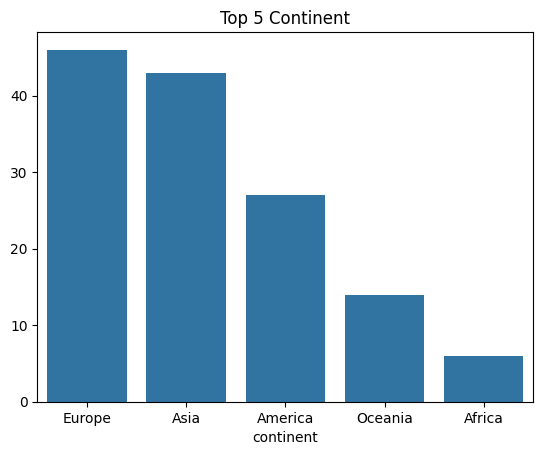

In [ ]:
continent = data_clean['continent'].value_counts()

sns.barplot(x=continent.index, y=continent.values)
plt.title("Top 5 Continent")

In [ ]:
print(continent)

continent
Europe     46
Asia       43
America    27
Oceania    14
Africa      6
Name: count, dtype: int64


In [ ]:
#Mengubah tipe data accomodation cost dan transportation cost
col_list = ["Transportation cost", "Accommodation cost"]

for col in col_list:
    data_clean[col] = data_clean[col].astype(str)
    data_clean[col] = data_clean[col].str.replace("$", "")
    data_clean[col] = data_clean[col].str.replace(" USD", "")
    data_clean[col] = data_clean[col].str.replace(",", "")
    data_clean[col] = pd.to_numeric(data_clean[col])

In [ ]:
data_clean[data_clean['continent'] == 'Europe'].describe()

,Trip ID,Start date,End date,Duration (days),Traveler age,Accommodation cost,Transportation cost
count,46.000000,46,46,46.000000,46.000000,46.000000,46.000000
mean,66.043478,2023-05-04 21:54:46.956521728,2023-05-12 00:00:00,7.152174,33.760870,1166.956522,529.347826
min,1.000000,2021-06-15 00:00:00,2021-06-20 00:00:00,5.000000,20.000000,180.000000,80.000000
25%,30.750000,2022-07-12 18:00:00,2022-07-19 00:00:00,6.000000,29.250000,700.000000,150.000000
50%,60.500000,2023-06-13 12:00:00,2023-06-21 00:00:00,7.000000,32.500000,900.000000,400.000000
75%,103.750000,2023-10-29 00:00:00,2023-11-05 06:00:00,8.000000,36.750000,1200.000000,700.000000
max,138.000000,2025-02-14 00:00:00,2025-02-20 00:00:00,11.000000,55.000000,6000.000000,2500.000000
std,41.058201,NaN,NaN,1.397894,6.925588,1093.619616,523.103568


In [ ]:
pd.pivot_table(data_clean, index='continent',
               values=['Trip ID','Traveler age','Accommodation cost','Transportation cost','Duration (days)'],
               aggfunc={
                   'Trip ID':pd.Series.nunique,
                   'Traveler age':[np.mean, np.median],
                   'Accommodation cost':np.mean,
                   'Transportation cost': np.mean,
                   'Duration (days)' :np.mean
               })

Accommodation cost Duration (days) Transportation cost Traveler age  \
                        mean            mean                mean         mean   
continent                                                                       
Africa           1000.000000        8.166667          750.000000    32.500000   
America          1588.888889        7.444444          741.666667    34.259259   
Asia             1051.162791        7.860465          563.255814    31.511628   
Europe           1166.956522        7.152174          529.347826    33.760870   
Oceania          1621.428571        8.428571         1046.428571    34.000000   

                 Trip ID  
          median nunique  
continent                 
Africa      30.0       6  
America     31.0      27  
Asia        29.0      43  
Europe      32.5      46  
Oceania     32.5      14

In [ ]:
data_clean['month'] = data_clean['Start date'].dt.month
data_clean['month'].value_counts()

month
8     17
9     17
7     16
5     15
6     15
11    11
2     10
10     9
1      9
3      6
4      6
12     5
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribusi Perjalanan dalam Bulan')

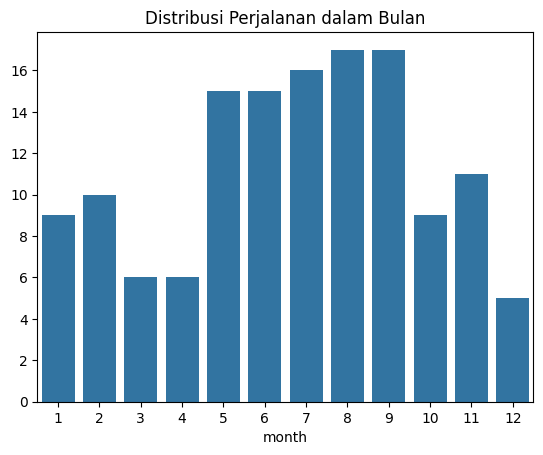

In [ ]:
top5_month = data_clean['month'].value_counts()
sns.barplot(x=top5_month.index, y=top5_month.values)
plt.title("Distribusi Perjalanan dalam Bulan")

Kesimpulan Pola Perjalanan:
* Paris menjadi destinasi paling populer dengan jumlah kunjungan sebanyak 14. Hal ini dapat menjadi pertimbangan dalam strategi pemasaran dan pengelolaan destinasi untuk menyesuaikan layanan dengan preferensi ini.
* Benua Eropa dan Asia menjadi tujuan yang diminati oleh pelanggan dan hal ini dapat digunakan sebagai fokus utama dalam pemasaran seperti menyediakan paket wisata yang unik dan menarik di wilayah tersebut.
* Jumlah kunjungan yang rendah di Benua Oseania dan Afrika dapat dilakukan pengembangan strategi promosi dengan cara penawaran paket diskon atau paket liburan khusus untuk mempromosikan destinasi di Oseania dan Afrika.
* Berdasarkan bulan, bulan Agustus (8) dan September (9) mencatat jumlah perjalanan terbanyak dengan masing-masing 17 perjalanan. Kemungkinan itu terkait musim liburan atau musim panas serta faktor lain seperti liburan sekolah. Agen travel dapat melakukan perencanaan dengan memberikan promosi atau penawaran khusus. Selain itu, strategi marketing juga dapat dilakukan pada musim dingin (Desember - Februari) untuk meningkatkan perjalanan dalam periode tersebut.


## Preferensi Wisatawan

In [ ]:
data_clean['Accommodation type'].value_counts()

Accommodation type
Hotel              59
Airbnb             30
Hostel             24
Resort             14
Villa               4
Vacation rental     3
Riad                1
Guesthouse          1
Name: count, dtype: int64

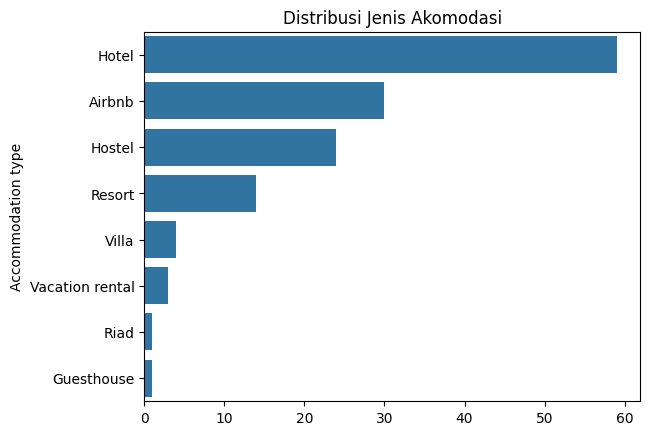

In [ ]:
accomodation_ = data_clean['Accommodation type'].value_counts()
sns.barplot(y=accomodation_.index, x=accomodation_.values)
plt.title("Distribusi Jenis Akomodasi")
plt.show()

In [ ]:
data_clean['Transportation type'].value_counts()

Transportation type
Plane         57
Train         37
Flight        13
Car rental    13
Bus            6
Airplane       5
Car            3
Subway         1
Ferry          1
Name: count, dtype: int64

In [ ]:
#Mengganti semua nilai 'Flight' dengan 'Plane' untuk memudahkan analisis
data_clean['Transportation type'] = data_clean['Transportation type'].replace('Flight','Plane')
data_clean['Transportation type'] = data_clean['Transportation type'].replace('Airplane','Plane')

In [ ]:
data_clean['Transportation type'].value_counts()

Transportation type
Plane         75
Train         37
Car rental    13
Bus            6
Car            3
Subway         1
Ferry          1
Name: count, dtype: int64

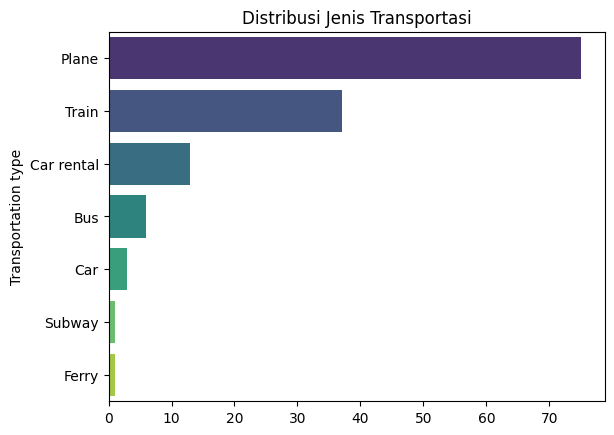

In [ ]:
transport_ = data_clean['Transportation type'].value_counts()
sns.barplot(y=transport_ .index, x=transport_ .values, palette='viridis')
plt.title("Distribusi Jenis Transportasi")
plt.show()

In [ ]:
#Membuat pengelompokkan usia
interval_age = pd.interval_range(start = 20, freq = 10, end=60)
data_clean['Interval age'] = pd.cut(data_clean['Traveler age'], bins = interval_age, include_lowest=True)
data_clean

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,year_month,continent,Interval age
0,1,London,2023-05-01,2023-05-08,7.0,John Smith,35.0,Male,American,Hotel,1200,Plane,600,2023-05,Europe,"(30, 40]"
1,2,Phuket,2023-06-15,2023-06-20,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Plane,500,2023-06,Asia,"(20, 30]"
2,3,Bali,2023-07-01,2023-07-08,7.0,David Lee,45.0,Male,Korean,Villa,1000,Plane,700,2023-07,Asia,"(40, 50]"
3,4,New York,2023-08-15,2023-08-29,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Plane,1000,2023-08,America,"(20, 30]"
4,5,Tokyo,2023-09-10,2023-09-17,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200,2023-09,Asia,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,Rio de Janeiro,2023-08-01,2023-08-10,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000,2023-08,America,"(30, 40]"
135,136,Vancouver,2023-08-15,2023-08-21,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Plane,3000,2023-08,America,"(20, 30]"
136,137,Bangkok,2023-09-01,2023-09-08,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000,2023-09,Asia,"(30, 40]"
137,138,Barcelona,2023-09-15,2023-09-22,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Plane,2500,2023-09,Europe,"(20, 30]"


In [ ]:
data_clean['Interval age'].value_counts()

Interval age
(20, 30]    60
(30, 40]    49
(40, 50]    24
(50, 60]     2
Name: count, dtype: int64

In [ ]:
#Melihat preferensi transportasi (modus) dengan kelompok usia
mode_transport_by_age = data_clean.groupby(["Interval age", 'Transportation type']).size().unstack(fill_value=0)
preferred_transport_by_age = mode_transport_by_age.idxmax(axis=1)
preferred_transport_by_age

Interval age
(20, 30]    Plane
(30, 40]    Plane
(40, 50]    Plane
(50, 60]    Plane
dtype: object

In [ ]:
#Melihat preferensi akomodasi (modus) dengan kelompok usia
mode_accomodate_by_age = data_clean.groupby(["Interval age", 'Accommodation type']).size().unstack(fill_value=0)
pmode_accomodate_by_age = mode_accomodate_by_age.idxmax(axis=1)
mode_accomodate_by_age

Accommodation type,Airbnb,Guesthouse,Hostel,Hotel,Resort,Riad,Vacation rental,Villa
Interval age,,,,,,,,
"(20, 30]",19,0,12,19,6,1,2,1
"(30, 40]",6,1,8,27,5,0,1,1
"(40, 50]",3,0,4,12,3,0,0,2
"(50, 60]",1,0,0,1,0,0,0,0


In [ ]:
data_clean['Total cost'] = data_clean['Accommodation cost'] + data_clean['Transportation cost']
data_clean

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,year_month,continent,Interval age,Total cost
0,1,London,2023-05-01,2023-05-08,7.0,John Smith,35.0,Male,American,Hotel,1200,Plane,600,2023-05,Europe,"(30, 40]",1800
1,2,Phuket,2023-06-15,2023-06-20,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Plane,500,2023-06,Asia,"(20, 30]",1300
2,3,Bali,2023-07-01,2023-07-08,7.0,David Lee,45.0,Male,Korean,Villa,1000,Plane,700,2023-07,Asia,"(40, 50]",1700
3,4,New York,2023-08-15,2023-08-29,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Plane,1000,2023-08,America,"(20, 30]",3000
4,5,Tokyo,2023-09-10,2023-09-17,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200,2023-09,Asia,"(20, 30]",900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,Rio de Janeiro,2023-08-01,2023-08-10,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000,2023-08,America,"(30, 40]",4500
135,136,Vancouver,2023-08-15,2023-08-21,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Plane,3000,2023-08,America,"(20, 30]",8000
136,137,Bangkok,2023-09-01,2023-09-08,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000,2023-09,Asia,"(30, 40]",3000
137,138,Barcelona,2023-09-15,2023-09-22,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Plane,2500,2023-09,Europe,"(20, 30]",8500


In [ ]:
pd.pivot_table(data_clean, index='Interval age',
               values=['Trip ID','Accommodation cost','Transportation cost','Duration (days)', 'Total cost'],
               aggfunc={
                   'Trip ID':pd.Series.nunique,
                   'Accommodation cost':np.mean,
                   'Transportation cost': np.mean,
                   'Duration (days)' :[np.mean, np.median],
                   'Total cost':np.mean
               })

Accommodation cost Duration (days)          Total cost  \
                           mean            mean median         mean   
Interval age                                                          
(20, 30]            1250.000000        7.983333    8.0  1875.000000   
(30, 40]            1258.775510        7.204082    7.0  1916.836735   
(40, 50]            1291.666667        7.541667    7.0  1970.833333   
(50, 60]            1200.000000        7.000000    7.0  1750.000000   

             Transportation cost Trip ID  
                            mean nunique  
Interval age                              
(20, 30]              625.000000      60  
(30, 40]              658.061224      49  
(40, 50]              679.166667      24  
(50, 60]              550.000000       2

Kesimpulan:
* Jenis akomodasi yang paling populer adalah hotel dengan 59 wisatawan yang memilih hotel. Ini menunjukkan bahwa  hotel lebih nyaman dan premium, memberikan fasilitas yang lengkap, serta lokasi yang strategis. Strategi pemasaran yang dilakukan yaitu dengan memberikan promosi paket wisata yang mengutamakan penginapan di hotel, menjalin kemitraan dengan hotel untuk mendapatkan penawaran khusus, serta memberikan layanan tambahan seperti antar-jemput bandara.
* Pesawat menjadi pilihan yang populer untuk tranportasi dalam berwisata yang tunjukkan dengan sebanyak 75 wisatawan lebih memilih menggunakan pesawat untuk perjalanan wisata. Wisatawan yang menggunakan pesawat mungkin karena efisiensi waktu, kecepatan, serta kenyamanan dalam perjalanan udara. Strategi pemasaran yang dapat dilakukan yaitu membuat kampanye untuk mempromosikan penawaran khusus atau diskon tiket pesawat, menyediakan berbagai pilihan penerbangan dengan fleksibilitas dalam jadwal dan opsi tambahan (asuransi atau layanan bagasi).
* Berdasarkan pemilihan akomodasi berdasarkan rentang usia didapatkan temuan sebagai berikut:
    1. Rentang usia 20 - 30 tahun cenderung memilih Airbnb dan hotel dengan jumlah yang sama. Ini menunjukkan bahwa wisatawan muda lebih memilih fleksibilitas dan pengalaman yang unik dari Airbnb tetapi juga mencari kenyamanan dan fasilitas yang disediakan oleh hotel.
    2. Rentang usia 30-40 tahun dan 40 - 50 tahun lebih memilih hotel dikarenakan pada rentang usia tersebut kemungkinan lebih mengutamakan kenyamanan dan layanan yang lengkap yang ditawarkan oleh hotel.
    3. Retang usia 50 - 60 tahun cenderung memilih Airbnb dan hotel dan menunjukkan adanya preferensi kenyamanan yang ditawarkan dari hotel tetapi ada keinginan pengalaman yang unik dan pribadi yang ditawarkan oleh Airbnb.

  Strategi yang bisa dilakukan yaitu membuat promosi antara AirBnb dan hotel dengan menonjolkan keunikan dan fleksibilitas dari Airbnb serta kenyamanan, fasilitas, dan layanan kamar untuk hotel.
* Rata-rata pengeluaran akomodasi untuk setiap kelompok usia berkisar 1200-an USD sedangkan pengeluaran untuk transportasi berkisar di rentang 500 - 600-an USD. Sebagian besar durasi liburannya berkisar 7 - 8 hari.



## Demografi Wisatawan

In [ ]:
data_clean['Traveler gender'].value_counts()

Traveler gender
Female    70
Male      66
Name: count, dtype: int64

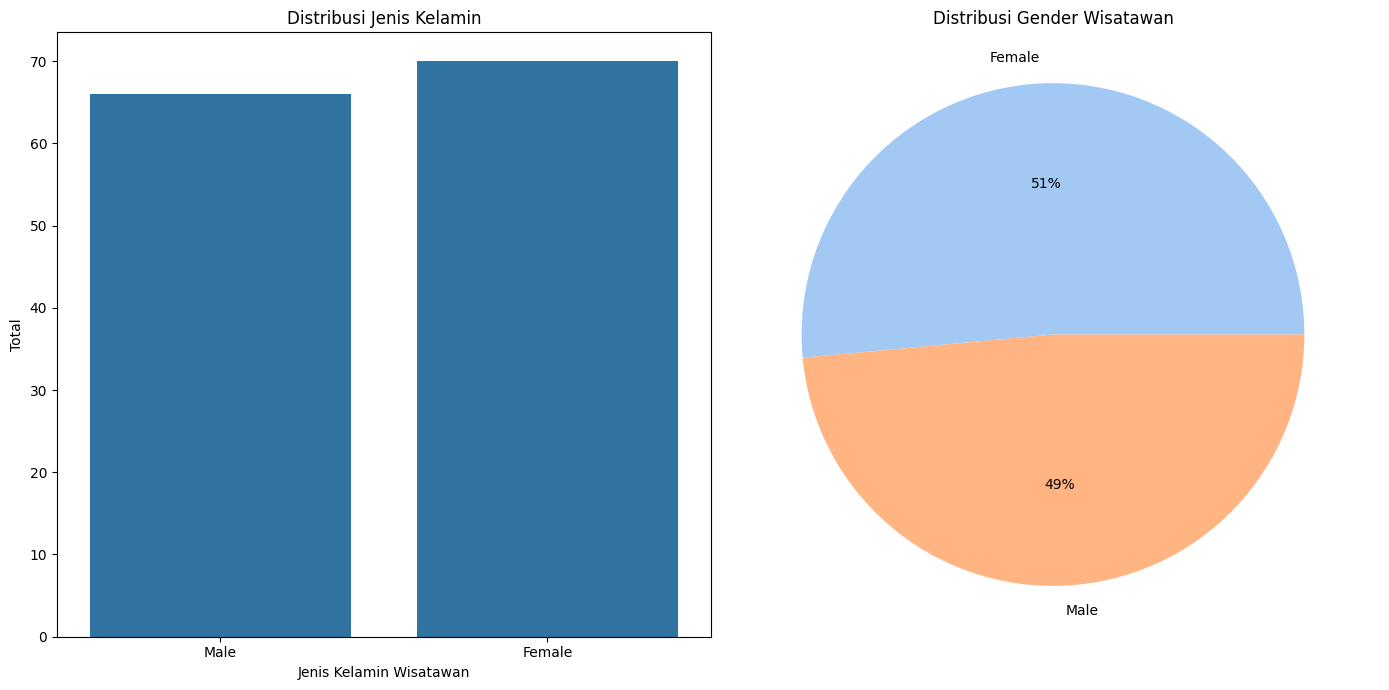

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

#Subplot 1 barplot
sns.countplot(data_clean, x ='Traveler gender',ax=axes[0])
axes[0].set_title('Distribusi Jenis Kelamin')
axes[0].set_xlabel('Jenis Kelamin Wisatawan')
axes[0].set_ylabel('Total')

#Subplot 2 pie chart
gender_count = data_clean['Traveler gender'].value_counts()
axes[1].pie(gender_count, labels=gender_count.index, autopct='%.0f%%', colors=sns.color_palette("pastel"))
axes[1].set_title('Distribusi Gender Wisatawan')
axes[1].axis('equal')

# Tampilkan plot
plt.tight_layout()
plt.show()

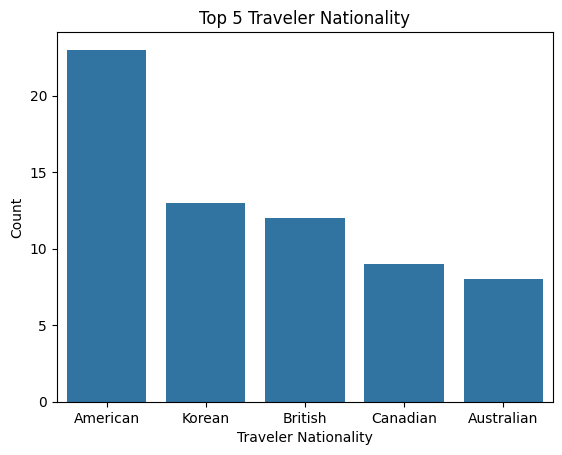

In [ ]:
top5_nationality = data_clean['Traveler nationality'].value_counts().head(5)

sns.barplot(x=top5_nationality.index, y=top5_nationality.values)
plt.title("Top 5 Traveler Nationality")
plt.xlabel('Traveler Nationality')
plt.ylabel('Count')
plt.show()

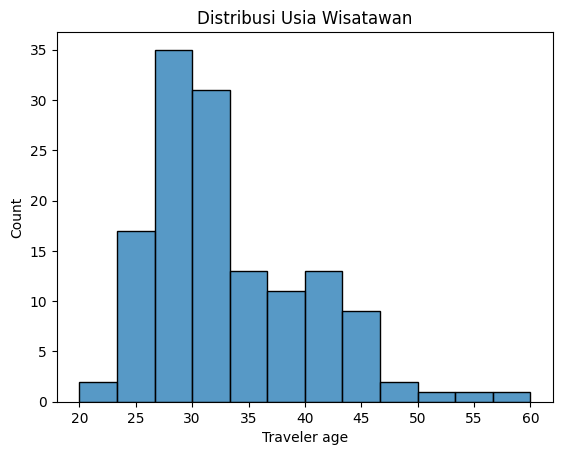

In [ ]:
sns.histplot(data = data_clean['Traveler age'])
plt.title('Distribusi Usia Wisatawan')
plt.show()

<Axes: ylabel='Traveler age'>

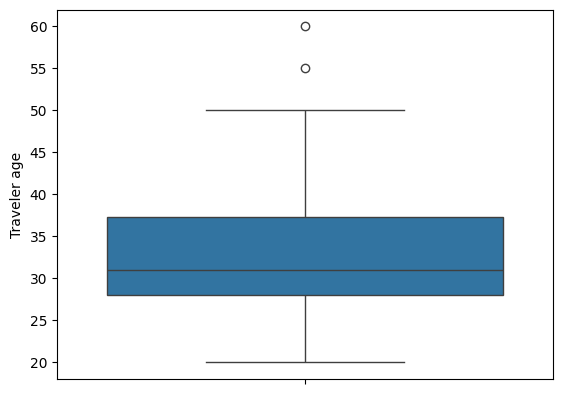

In [ ]:
sns.boxplot(data=data_clean['Traveler age'])

Kesimpulan:
* Hasil eksplorasi data terhadap jenis kelamin wisatawan menunjukkan bahwa adanya perbedaan tetapi tidak terlalu signifikan. Persentasi laki-laki dan perempuan masing-masing 49% dan 51%. Data ini menunjukkan adanya keseimbangan yang hampir sama antara jumlah wisatawan laki-laki maupun perempuan.
* Wisatawan dari Amerika merupakan kelompok terbesar dalam dataset dan menunjukkan potensi pasar yang signifikan dari Amerika.
* Sebagian besar wisatawan berusia antara 25 - 35 tahun dengan kelompok terbesar adalah sekitar 30 tahun. Ini menunjukkan bahwa kelompok usia tersebut memiliki banyak waktu atau sumber daya untuk berpergian. Terdapat beberapa outliers pada sekitar usia 55 dan 60 tahun dan menggambarkan beberapa wisatawan yang usianya jauh lebih tua dibandingkan dengan mayoritas wisawatan dalam dataset.

Strategi:
* Mengembangkan dan mempromosikan paket perjalanan yang menarik bagi wisatawan dengan berbagai latar belakang yang berfokus pada keragaman produk.
* Menyusun kampanye pemasaran yang efektif, khususnya untuk pasar Amerika yang dominan
* Menawarkan paket perjalanan yang penuh petualangan dan aktivitas fisik yang umumnya diminati oleh kelompok usia muda (25-35 tahun), membuat sebuah diskon atau paket bundling untuk pasangan muda atau kelompok teman yang berpergian bersama, serta mewarkan paket wisata untuk wisatawan yang lebih tua seperti tur budaya, kunjungan ke spa, atau perjalanan wisata kuliner.

# Kesimpulan

Destinasi Populer dan Preferensi Wisatawan:
* Paris menjadi destinasi populer dengan jumlah kunjungan tertinggi
* Jenis akomodasi paling populer adalah hotel yang menunjukkan kenyamanan dan fasilitas premium
* Pesawat menjadi moda transportasi utama karena efisiensi waktu dan kenyamanan

Demografi Wisatawan:
* Mayoritas wisatawan berusia antara 25-35 tahun dengan kelompok terbesar berada di sekitar usia 30 tahun
* Proporsi wisatawan laki-laki dan perempuan hampir seimbang

Rekomendasi Strategis:
* Mengembangkan paket wisata yang menarik berdasarkan preferensi demografis dan destinasi populer seperti paris
* Menyusun strategi pemasaran yang mempromosikan kenyamanan hotel dan ketersediaan layanan tambahan
* Fokus pada promosi tiket pesawat dan pilihan penerbangan yang beragam untuk menarik lebih banyak wisatawan

